In [1]:
from autograd import grad 
from autograd import numpy as np
from autograd import value_and_grad 
import matplotlib.pyplot as plt
import seaborn as sns
import utils

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True 

### Impact of learning rate/step length

In [2]:
a1 = 0
b1 = np.sin(10)*np.ones((2,1))
C1 = np.array([[0.5,1],[0,9.75]])
g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

w = np.array([10.0,1.0]) # 2D initialization point
weight_1 = np.linspace(-1,10,100)
weight_2 = np.linspace(-1,1,100)


In [3]:
# alpha_choice = 1
# max_its = 50
# weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
# cost_history

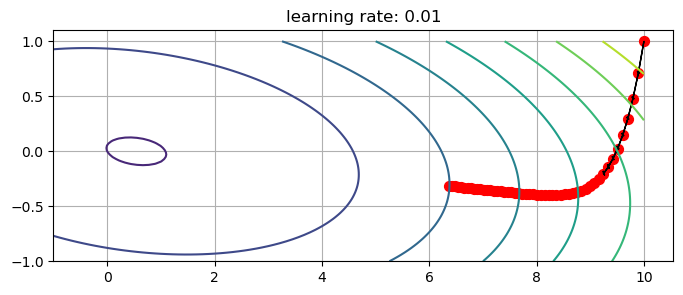

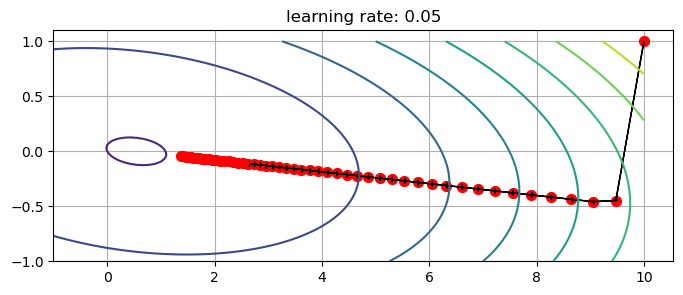

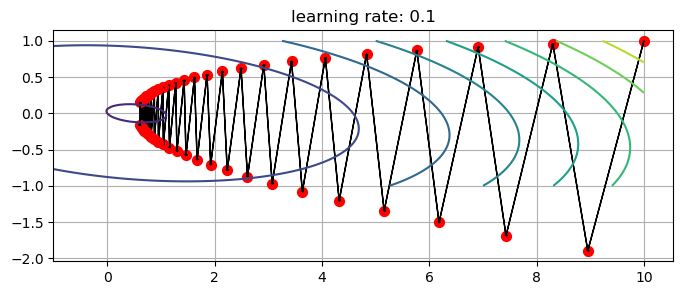

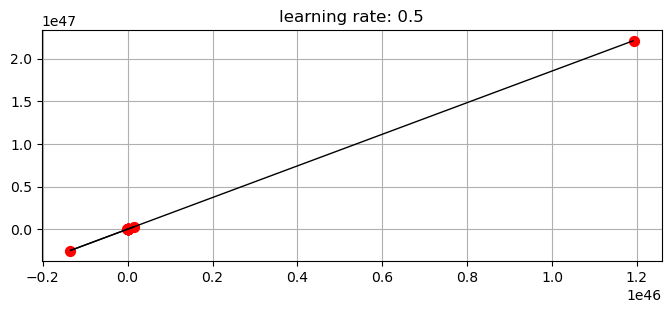

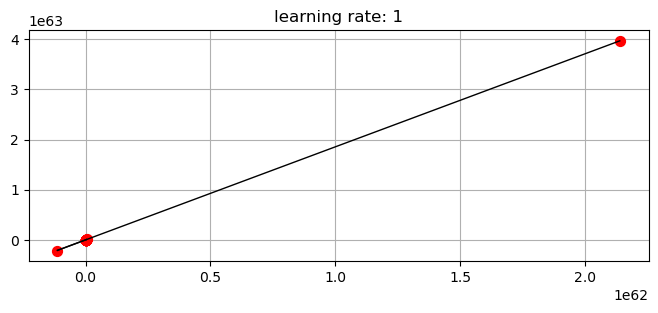

In [4]:
alpha = [10**(-2), 0.05,  10**(-1), 0.5, 10**(0)]
max_its = 50

for alpha_choice in alpha:
    weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)

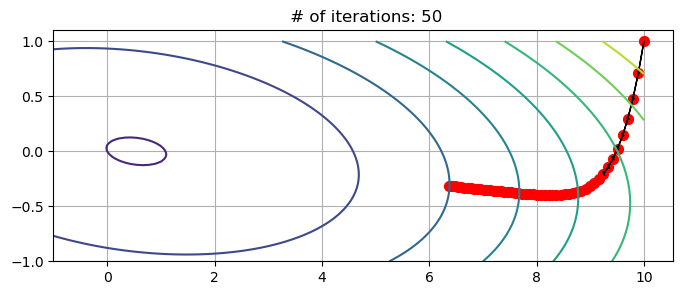

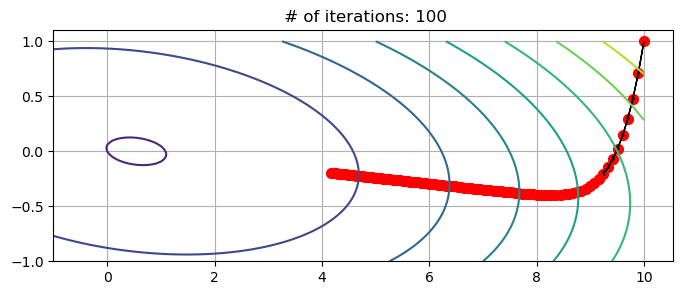

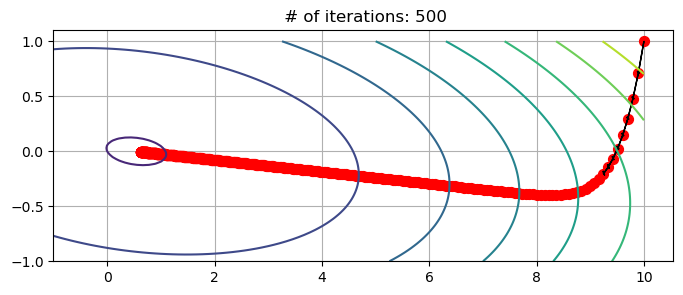

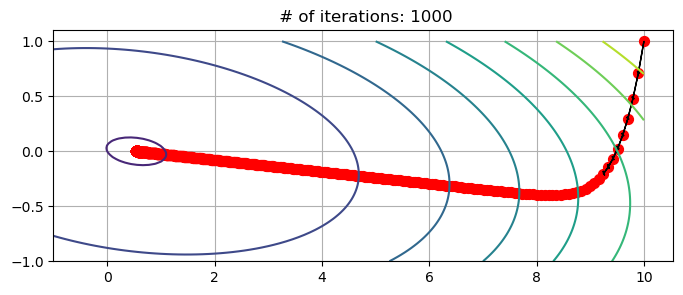

In [5]:
max_its = 50
max_its_arr = [50,100,500,1000]

alpha_choice = 0.01
for max_its in max_its_arr:
    weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)
    plt.title(f' # of iterations: {max_its}')

## Plotting cost function

(100, 2)
(100,)


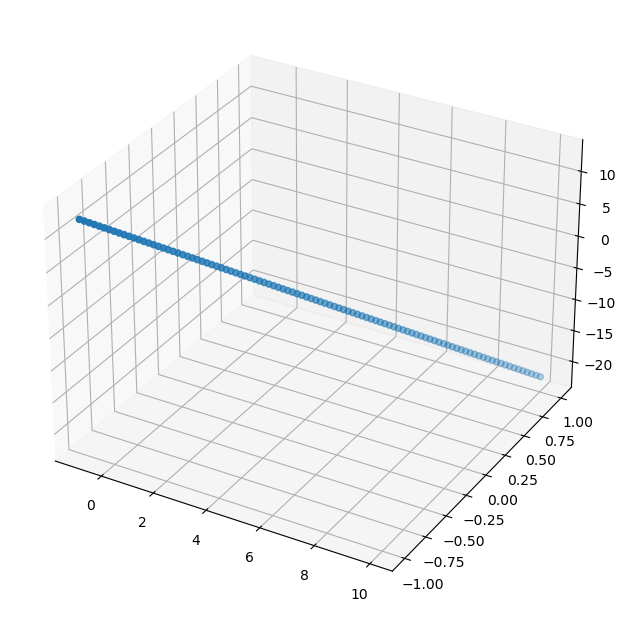

In [6]:


w_mat = np.array([weight_1, weight_2]).T
gTemp = g(w_mat.T)
print(w_mat.shape)
print(gTemp.shape)

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
sc = ax.scatter(weight_1, weight_2, gTemp, marker='o')

## Plotting surface of cost function

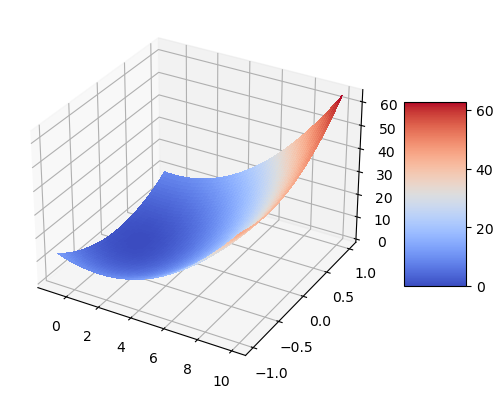

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(w1_vals, w2_vals, func_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=3)